> This assignment as two parts Section A and B. The first part is the implementation of function required in applying the CNN layers and the next section will be around the use of built in function of Tensorflow



`Before moving ahead as we have reached the stage of applying CNNs. We are going to deal with large number of parameters and hence more computational power. So you will need to connect runtime of collab to GPU: https://www.youtube.com/watch?v=-9CLfrZISRw`

### **BOTH THE SECTION CAN BE SOLVED INDEPENDENTLY** BUT SECTION A has **3X** more weightage than SECTION B doesn't have any code to write.

## **SECTION:A**

In [253]:
import numpy as np

### Q1: Complete the following function corr2d(X, K), which implements the cross correlation operation for matrix X and kernel K, both are two dimensional numpy arrays (height x width). The function should return a 2 dimensional numpy array which is the result of cross correlation operation between X and K. 

- not giving channels right now : assume channels = 1

In [254]:
def corr2d(X: np.array, K: np.array) -> np.array:

  # no padding for now and assume stride = 1

  output_h = X.shape[0] - K.shape[0] + 1
  output_w = X.shape[1] - K.shape[1] + 1

  output = np.zeros((output_h, output_w))

  for i in range(output_h):
    for j in range(output_w):
      output[i][j] = np.sum(X[i:i+K.shape[0], j:j+K.shape[1]] * K)

  return output
 


In [255]:
X = np.array([[0.0, 1.0, 2.0], [3.0, 4.0, 5.0], [6.0, 7.0, 8.0]], dtype=np.float32)
K = np.array([[0.0, 1.0], [2.0, 3.0]], dtype=np.float32)
print(corr2d(X, K)) # example done in class, try to print this and check if you get the right answer

[[19. 25.]
 [37. 43.]]


### now try to make a new function corr2d_multiple_input_channels(X, K) : where each X and K have the same number of channels, both of them are now 3 dimensional numpy arrays, the output should be a 2 dimensional numpy array (output_h, output_w).

- hint : Use the above corr2d function and read about np.stack

In [256]:
def corr2d_multiple_input_channels(X: np.array, K: np.array) -> np.array: 
    # write a function for this task
    
    input_channels = X.shape[0]

    output_ht = X.shape[1] - K.shape[1] + 1
    output_wt = X.shape[2] - K.shape[2] + 1

    output_matrix = np.zeros((output_ht, output_wt))
    X_new = np.stack(X, axis=0)
    K_new = np.stack(K, axis=0)
    for i in range (input_channels):
      output_matrix += corr2d(X_new[i], K_new[i])

    return output_matrix


In [257]:
new_X = np.stack([X, X+1, X+2], axis=0) # stacking along a new dimension
new_K = np.stack([K, K+1, K+2], axis=0) 

print(f"new_X.shape = {new_X.shape}, new_K.shape = {new_K.shape}")
print(corr2d_multiple_input_channels(new_X, new_K))
# calculate the output by hand and then check whether you get the same answer
# answer should be a 2 dim np array : (output_height, output_width) 

new_X.shape = (3, 3, 3), new_K.shape = (3, 2, 2)
[[119. 149.]
 [209. 239.]]


### Write another function corr2d_mutli_in_out(X, K): where X (3 dim np array), K (4 dim numpy array), 0th dimension of K represents the number of kernel/filters we are using. Perform the cross correlation operation for K on X and return the output : 3 dim numpy array whose shape should be (num_output_channels, output_height, output_width)

- hint : use the above corr_2d_mutliple_input_channels(X, K) for each kernel in K and then stack them.

In [258]:
def corr2d_multi_in_out(X: np.array, K: np.array) -> np.array:
    # X -> (num_in_channels, n_h, n_w)
    # K -> (num_out_channels, num_in_channels, k_h, k_w)
    # output -> (num_out_channels, o_h, o_w)
    
    Output_channels = K.shape[0]
    output_h = X.shape[1] - K.shape[2] + 1
    output_w = X.shape[2] - K.shape[3] + 1

    Result = np.zeros((Output_channels, output_h, output_w))

    for i in range(Output_channels):
      Result[i] = corr2d_multiple_input_channels(X, K[i])

    return Result

In [259]:
my_K = np.stack([new_K, new_K+1, new_K+2, new_K + 3], axis=0) 
print(f"my_K.shape = {my_K.shape}")

print(corr2d_multi_in_out(new_X, my_K)) # cross check the calculation

my_K.shape = (4, 3, 2, 2)
[[[119. 149.]
  [209. 239.]]

 [[155. 197.]
  [281. 323.]]

 [[191. 245.]
  [353. 407.]]

 [[227. 293.]
  [425. 491.]]]


### Q2: What is the computational and statistical benefits of stride larger than 1?? (not more than 20 word answer for each)
**Computational Benefits**:
Stride larger than 1 skips computation for some input elements, resulting in faster processing and fewer data elements generated, reducing memory consumption during forward and backward propagation.

**Statistical Benefits:**
Larger stride reduces spatial resolution, which can be desirable for reducing overfitting and model complexity. Also, it allows for a larger receptive field, capturing more contextual information from input. 

### Q3: Now let's implement a model with just a single convolution layer, given X(input), Y(output) and K(kernel). Y is the output of the cross-correlation operation of K on X. You need to build a model to learn that kernel K.(try to print the kernel at each epoch)

- hint : conv_layer(output_channels = 1, input_channels = 1, kerenl_size=(1, 2), bias=False)

In [260]:
X = np.ones((6, 8), dtype=np.float32)
X[:, 2:6] = 0
print(X)

[[1. 1. 0. 0. 0. 0. 1. 1.]
 [1. 1. 0. 0. 0. 0. 1. 1.]
 [1. 1. 0. 0. 0. 0. 1. 1.]
 [1. 1. 0. 0. 0. 0. 1. 1.]
 [1. 1. 0. 0. 0. 0. 1. 1.]
 [1. 1. 0. 0. 0. 0. 1. 1.]]


In [261]:
K = np.array([[1.0, -1.0]], dtype=np.float32) # kernel, you need to learn this using a model
Y = corr2d(X, K) 
print(Y)

[[ 0.  1.  0.  0.  0. -1.  0.]
 [ 0.  1.  0.  0.  0. -1.  0.]
 [ 0.  1.  0.  0.  0. -1.  0.]
 [ 0.  1.  0.  0.  0. -1.  0.]
 [ 0.  1.  0.  0.  0. -1.  0.]
 [ 0.  1.  0.  0.  0. -1.  0.]]


In [262]:
X = X.reshape((1, 6, 8, 1)) # this will be the input to the model
Y = Y.reshape((1, 6, 7, 1)) # this is the output, to be used while calculation loss
lr = 3e-2 # use this learning rate

import tensorflow as tf
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Conv2D(1,(1,2), use_bias=False))

model.compile(optimizer = tf.keras.optimizers.Adam(learning_rate = lr), loss = 'mse', metrics = ['accuracy'])

epochs = 50
for i in range (epochs):
  model.fit(X, Y , epochs = 1)
  kernel = model.get_weights()[0]
  kernel = np.array(kernel).flatten()
  kernel = kernel.reshape((1,2))
  print("Trained Kernel:", kernel)


1/1 [==============================] - 0s 403ms/step - loss: 0.1308 - accuracy: 0.7143
Trained Kernel: [[ 0.35837945 -0.3485971 ]]
1/1 [==============================] - 0s 8ms/step - loss: 0.1195 - accuracy: 0.7143
Trained Kernel: [[ 0.3883341  -0.37855554]]
1/1 [==============================] - 0s 8ms/step - loss: 0.1086 - accuracy: 0.7143
Trained Kernel: [[ 0.41821018 -0.40844217]]
1/1 [==============================] - 0s 8ms/step - loss: 0.0984 - accuracy: 0.7143
Trained Kernel: [[ 0.4479723  -0.43822488]]
1/1 [==============================] - 0s 14ms/step - loss: 0.0886 - accuracy: 0.7143
Trained Kernel: [[ 0.4775822 -0.4678691]]
1/1 [==============================] - 0s 11ms/step - loss: 0.0795 - accuracy: 0.7143
Trained Kernel: [[ 0.50699914 -0.4973381 ]]
1/1 [==============================] - 0s 8ms/step - loss: 0.0708 - accuracy: 0.8571
Trained Kernel: [[ 0.5361801  -0.52659297]]
1/1 [==============================] - 0s 8ms/step - loss: 0.0628 - accuracy: 0.8571
Trained Ke

### Q4: Complete the following function max_pool2d(X, K) which performs maxpooling with kernel size K on X and returns and two dim numpy array

In [263]:
def max_pool2d(X: np.array, K: tuple) -> np.array:
    # write a function for this job
    height, width = X.shape
    kernel_height, kernel_width = K

    output_height = height // kernel_height + 1
    output_width = width // kernel_width + 1

    output = np.zeros((output_height, output_width))

    for i in range(output_height):
        for j in range(output_width):
            region = X[i * kernel_height : (i + 1) * kernel_height, j * kernel_width : (j + 1) * kernel_width]
            output[i, j] = np.max(region)

    return output

In [264]:
X = np.array([[0.0, 1.0, 2.0], [3.0, 4.0, 5.0], [6.0, 7.0, 8.0]], dtype=np.float32)
max_pool2d(X, (2, 2)) # check if the output matches with your calculation

array([[4., 5.],
       [7., 8.]])

# **SECTION:B**



### **JUST RUN THE CELLS AND VISUALIZE**( Nothing to code 🙂 )

> Indented block



In [288]:
import matplotlib.pyplot as plt
import tensorflow as tf

In [289]:
#importing the dataset
(X_train,Y_train),(X_test,Y_test) = tf.keras.datasets.cifar10.load_data()
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(X_train,Y_train,test_size=0.3)

In [290]:
# Print shape of all 4 variables: X_train,Y_train,X_test, and Y_test
print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)

(35000, 32, 32, 3)
(15000, 32, 32, 3)
(35000, 1)
(15000, 1)


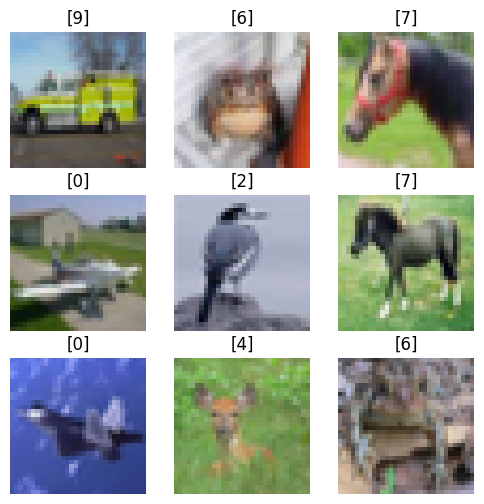

In [291]:
#Lets visualize the CIFAR-10 dataset

import random
figure = plt.figure(figsize=(6,6))

for i in range(9):
  index = random.randint(0,len(X_train)-1) # showing the index_th image
  
  plt.subplot(3,3,i+1)
  plt.imshow(X_train[index])
  plt.title(Y_train[index])
  plt.axis(False)

In [ ]:
"""
So you can probably notice here that the images are 3D(coloured) but still 
not of great quality ( what can you expect from 32x32 image). Also there are
certain other factors which makes the classification a bit tougher than the 
cases of 2D( the digit and the fashion data) you dealt before. We will try to
understand the difficulties and find probable solution for them.
"""

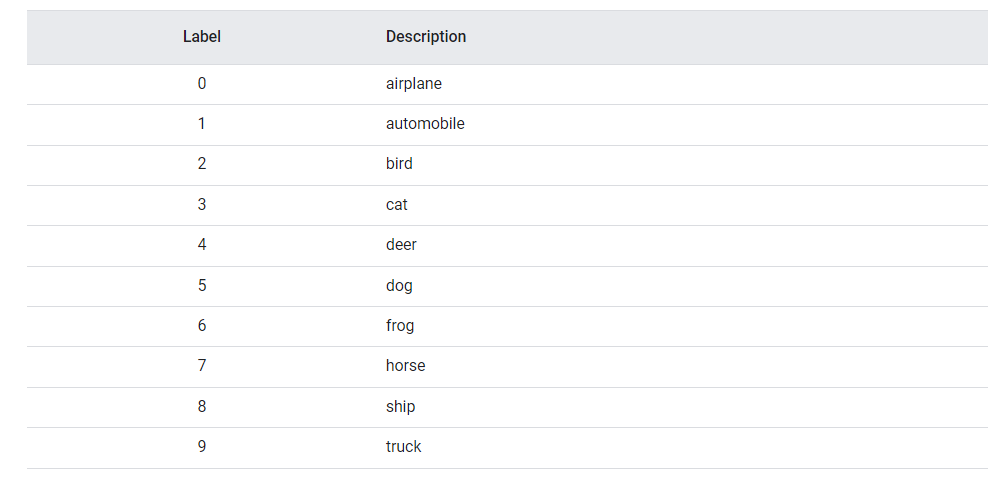

In [ ]:
"""
Lets first start with the CNN model discussed in the class for digit
 classification. Notice that I have changed the input shape for this usecase.
 Earlier it was (28,28,1) for the digit dataset.
"""

In [292]:
# model initialization
cnn_model = tf.keras.Sequential()

# adding the 1st layer of CNN
cnn_model.add(tf.keras.layers.Conv2D(26, (5,5), activation = 'relu', input_shape=(32,32,3)))

# adding a maxpooling
cnn_model.add(tf.keras.layers.MaxPooling2D((2,2)))

#adding another CNN layer
cnn_model.add(tf.keras.layers.Conv2D(16, (5,5), activation = 'relu'))

# adding another maxpooling layer
cnn_model.add(tf.keras.layers.MaxPooling2D((2,2)))

#flattening the layer
cnn_model.add(tf.keras.layers.Flatten())

# 20 x 20 x 16
#dense layer
cnn_model.add(tf.keras.layers.Dense(64, activation='relu'))

# final layer 
cnn_model.add(tf.keras.layers.Dense(10, activation='softmax'))

In [293]:
cnn_model.compile(optimizer = tf.keras.optimizers.Adam(learning_rate=0.001),
                  loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
                  metrics=['accuracy'])

In [238]:
"""
Explain what is Adam optimizer below in atleast 250 words.[ read on web and explain ]

Answer: Adaptive Moment Estimation is an algorithm for optimization technique for gradient descent. The method is really efficient when working with
       large problem involving a lot of data or parameters. It requires less memory and is efficient. Intuitively, it is a combination of the 
       ‘gradient descent with momentum’ algorithm and the ‘RMSP’ algorithm. It is an optimization algorithm that can be an alternative for the 
       stochastic gradient descent process.The main idea behind Adam is to adjust the learning rate for each parameter based on their past gradients
        and squared gradients. This adaptive adjustment helps in overcoming the limitations of fixed learning rates, allowing for faster convergence
       and better generalization.

       Momentum:This algorithm is used to accelerate the gradient descent algorithm by taking into consideration the ‘exponentially weighted average’ 
                of the gradients. Using averages makes the algorithm converge towards the minima in a faster pace. 

        Root Mean Square Propagation (RMSP):
        Root mean square prop or RMSprop is an adaptive learning algorithm that tries to improve AdaGrad. Instead 
        of taking the cumulative sum of squared gradients like in AdaGrad, it takes the ‘exponential moving average’.        


        The update rule for Adam involves the following steps:
        1.) Initialize the first moment estimate (m) and the second moment estimate (v) for each parameter to zero.
        2.)Compute the gradients of the parameters using the current mini-batch.
        3.)Update the first moment estimate by calculating the exponentially weighted average of the gradients: m = β1 * m + (1 - β1) * gradient.
        4.)Update the second moment estimate by calculating the exponentially weighted average of the squared gradients: v = β2 * v + (1 - β2) * gradient^2.
        5.)Bias correction: Adjust the first and second moment estimates to account for their initialization at zero in the early stages of training: m_hat = m / (1 - β1^t)
           and v_hat = v / (1 - β2^t), where t is the current iteration.
        6.)Update the parameters by applying the Adam update formula: parameter = parameter - learning_rate * m_hat / (sqrt(v_hat) + epsilon), where epsilon is a small constant to avoid division by zero.
        
        The parameters β1 and β2 control the decay rates of the moving averages, typically set to 0.9 and 0.999, respectively. The learning rate determines the step size taken 
        during parameter updates. The small constant epsilon is added for numerical stability.
       
        
"""
""" Reference
               https://optimization.cbe.cornell.edu/index.php?title=Adam#:~:text=Adam%20optimizer%20is%20the%20extended,processing%20in%20the%20future%20years
               https://www.geeksforgeeks.org/intuition-of-adam-optimizer/
               https://www.tensorflow.org/api_docs/python/tf/keras/optimizers/Adam
"""

' Reference\n               https://optimization.cbe.cornell.edu/index.php?title=Adam#:~:text=Adam%20optimizer%20is%20the%20extended,processing%20in%20the%20future%20years\n               https://www.geeksforgeeks.org/intuition-of-adam-optimizer/\n               https://www.tensorflow.org/api_docs/python/tf/keras/optimizers/Adam\n'

### **Make sure that you are connected to GPU runtime other wise the training in next cell is going to take a long time**

In [294]:
history = cnn_model.fit(X_train, Y_train, epochs=10, validation_split=0.2)

Epoch 1/10
875/875 [==============================] - 5s 4ms/step - loss: 2.6440 - accuracy: 0.0968 - val_loss: 2.3030 - val_accuracy: 0.0999
Epoch 2/10
875/875 [==============================] - 4s 5ms/step - loss: 2.3020 - accuracy: 0.0999 - val_loss: 2.3014 - val_accuracy: 0.0997
Epoch 3/10
875/875 [==============================] - 4s 4ms/step - loss: 2.2996 - accuracy: 0.1019 - val_loss: 2.3027 - val_accuracy: 0.0994
Epoch 4/10
875/875 [==============================] - 3s 4ms/step - loss: 2.2992 - accuracy: 0.1020 - val_loss: 2.3149 - val_accuracy: 0.1011
Epoch 5/10
875/875 [==============================] - 4s 5ms/step - loss: 2.2997 - accuracy: 0.1010 - val_loss: 2.3026 - val_accuracy: 0.1047
Epoch 6/10
875/875 [==============================] - 4s 4ms/step - loss: 2.2999 - accuracy: 0.1012 - val_loss: 2.3054 - val_accuracy: 0.0947
Epoch 7/10
875/875 [==============================] - 4s 4ms/step - loss: 2.3015 - accuracy: 0.1030 - val_loss: 2.3018 - val_accuracy: 0.0996
Epoch 

In [272]:
""" 
Write about validation accuracy in 100 words.

Answer: Validation accuracy is a performance metric used to evaluate the effectiveness of a learning modelduring training. It measures the accuracy
        of the model's predictions on a separate validation dataset that is not used for training.The validation accuracy indicates how well the model
        generalizes to new, unseen data. It is computed by comparing the predicted labels of the model with the true labels in the validation dataset
        and calculating the proportion of correct predictions. A higher validation accuracy indicates that the model is performing well on unseen data,
        while a lower accuracy suggests the model may be overfitting or underperforming.
        
        In the above example, validation accuracy has increased with increasing number of epochs, indicating that our model is getting
        trained, and there is no random guessing.
"""

" \nWrite about validation accuracy in 100 words.\n\nAnswer: Validation accuracy is a performance metric used to evaluate the effectiveness of a learning modelduring training. It measures the accuracy\n        of the model's predictions on a separate validation dataset that is not used for training.The validation accuracy indicates how well the model\n        generalizes to new, unseen data. It is computed by comparing the predicted labels of the model with the true labels in the validation dataset\n        and calculating the proportion of correct predictions. A higher validation accuracy indicates that the model is performing well on unseen data,\n        while a lower accuracy suggests the model may be overfitting or underperforming.\n        \n        In the above example, validation accuracy has increased with increasing number of epochs, indicating that our model is getting\n        trained, and there is no random guessing.\n"

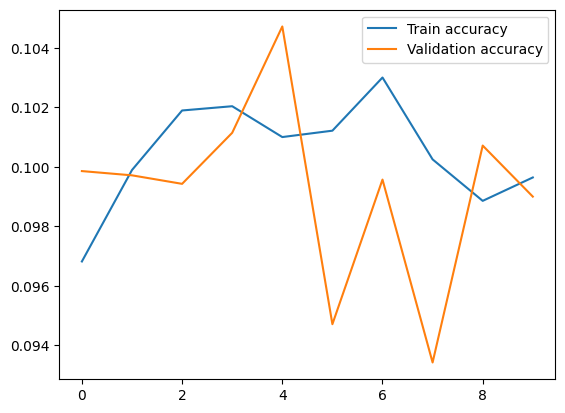

In [295]:
plt.plot(history.history['accuracy'],label="Train accuracy")
plt.plot(history.history['val_accuracy'], label = "Validation accuracy")
plt.legend()

In [274]:
"""
What do you think is happening? Is the model training or not?
 You can see that both the training and validation accuracy are
 just roaming around 0.1. 
 One reason for this can be our model architecture. We had 26 filters
 in our first layer and 16 filters in our next layer. This funnel down approach
 works for dense layers but for Conv layers( which are good at feature extraction)
 we want them to extract more and more features.

 So lets change that to funne up --> 16 and 32 in the layers respectively
"""

'\nWhat do you think is happening? Is the model training or not?\n You can see that both the training and validation accuracy are\n just roaming around 0.1. \n One reason for this can be our model architecture. We had 26 filters\n in our first layer and 16 filters in our next layer. This funnel down approach\n works for dense layers but for Conv layers( which are good at feature extraction)\n we want them to extract more and more features.\n\n So lets change that to funne up --> 16 and 32 in the layers respectively\n'

In [296]:
# model initialization
cnn_model = tf.keras.Sequential()

"""adding the 1st layer of CNN(Changed)"""
cnn_model.add(tf.keras.layers.Conv2D(16, (5,5), activation = 'relu', input_shape=(32,32,3)))

# adding a maxpooling
cnn_model.add(tf.keras.layers.MaxPooling2D((2,2)))

"""adding the 2nd layer of CNN(Changed)"""
cnn_model.add(tf.keras.layers.Conv2D(32, (5,5), activation = 'relu'))

# adding another maxpooling layer
cnn_model.add(tf.keras.layers.MaxPooling2D((2,2)))

#flattening the layer
cnn_model.add(tf.keras.layers.Flatten())

# 20 x 20 x 16
#dense layer
cnn_model.add(tf.keras.layers.Dense(64, activation='relu'))

# final layer 
cnn_model.add(tf.keras.layers.Dense(10, activation='softmax'))

In [297]:
cnn_model.compile(optimizer = tf.keras.optimizers.Adam(learning_rate=0.001),
                  loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
                  metrics=['accuracy'])

In [298]:
history = cnn_model.fit(X_train, Y_train, epochs=20, validation_split=0.2)

Epoch 1/20
875/875 [==============================] - 5s 4ms/step - loss: 2.6294 - accuracy: 0.1353 - val_loss: 2.3068 - val_accuracy: 0.1031
Epoch 2/20
875/875 [==============================] - 4s 4ms/step - loss: 2.0653 - accuracy: 0.2334 - val_loss: 1.8924 - val_accuracy: 0.2996
Epoch 3/20
875/875 [==============================] - 3s 4ms/step - loss: 1.8321 - accuracy: 0.3243 - val_loss: 1.7215 - val_accuracy: 0.3660
Epoch 4/20
875/875 [==============================] - 3s 4ms/step - loss: 1.6962 - accuracy: 0.3757 - val_loss: 1.6195 - val_accuracy: 0.3999
Epoch 5/20
875/875 [==============================] - 3s 4ms/step - loss: 1.6004 - accuracy: 0.4106 - val_loss: 1.5634 - val_accuracy: 0.4241
Epoch 6/20
875/875 [==============================] - 4s 5ms/step - loss: 1.5212 - accuracy: 0.4458 - val_loss: 1.4839 - val_accuracy: 0.4663
Epoch 7/20
875/875 [==============================] - 4s 4ms/step - loss: 1.4526 - accuracy: 0.4756 - val_loss: 1.4887 - val_accuracy: 0.4673
Epoch 

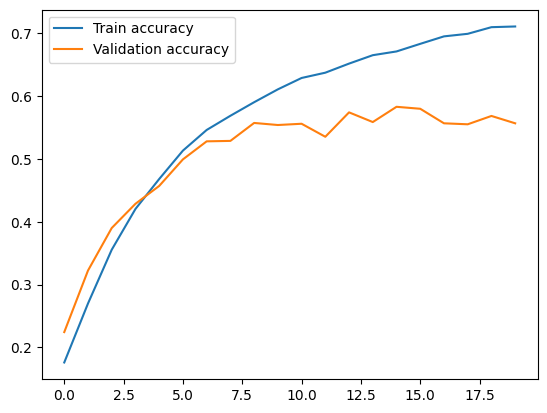

In [278]:
plt.plot(history.history['accuracy'],label="Train accuracy")
plt.plot(history.history['val_accuracy'], label = "Validation accuracy")
plt.legend()

In [279]:
"""
Did our model improved??
Are we done with the job?
What is happening after 5( roughly ) epochs? Why is there a gap between
training and validation accuracy?

Our training accuracy reached to 0.73( and still increasing ) but 
the validation accuracy seems to stagnate at 0.52.

Is our model overfitting on the training data so much that it can't work well 
on unseen data.
"""
""" 
Yes our model has improved as we can see that the training accuracy has increased.
But our job is not done yet, as the training accuracy and validation accuracy diverge. 
With the increase of epochs the validation loss first decrease but after (roughly 5) epochs
it starts to increase; also, there is a significant gap between training accuracy and validation accuracy 
which indicates that there might be case of overfitting.
"""

' \nYes our model has improved as we can see that the training accuracy has increased.\nBut our job is not done yet, as the training accuracy and validation accuracy diverge. \nWith the increase of epochs the validation loss first decrease but after (roughly 5) epochs\nit starts to increase; also, there is a significant gap between training accuracy and validation accuracy \nwhich indicates that there might be case of overfitting.\n'

In [280]:
"""
How are we gonna tackel this problem?
Well, we will see that in next part of this assignment.
Till then lets learn about about overfitting.
"""

'\nHow are we gonna tackel this problem?\nWell, we will see that in next part of this assignment.\nTill then lets learn about about overfitting.\n'

> **Well using Chatgpt to answer these question is something which everyone can think of right?? To create a difference write answer in your own terms after reading from web or reading the answer of Chatgpt.**
### **After all this is your midterm evaluation. Cheating is something we can catch easily** ( we have also done this )

In [281]:
"""
[CLARIFICATION]: Reading and understanding by searching on Chatgpt is not 
considered as cheating as long as you are writing that in your own word
( only problem is the crediblity of its information)

"""

'\n[CLARIFICATION]: Reading and understanding by searching on Chatgpt is not \nconsidered as cheating as long as you are writing that in your own word\n( only problem is the crediblity of its information)\n\n'

In [282]:
"""
Question: What is overfitting and underfitting below ( atleast 200 words )

Answer: Overfitting is the undesirable machine learning behaviour that occurs when the machine learning model gives accurate predictions about training data but not for new data. 
        When we use machine learning models for making predictions, then we have to first train the model for some known dataset and based on this information model tries to predict
        outcomes for the new or unseen data. But an overfit model can give inaccurate predictions of the outcomes for new data and it may not work well for all type of new dataset.
        It occurs due to low bias(error rate of the training data) and high variance(difference between the error rate of training data and the test data). There can be many reasons
        for the overfitting of a model. 
        •The training data size of the model is so small that does not contain enough data samples to accurately represent all possible input data values.
        •The training data contain many irrelevant information, called noisy data.
        •The model is too complex.

        Underfitting occurs when the model has not learned the patterns in the training data well and is unable to generalize well on new data. An underfit model has poor performance 
        on the training data and will result in some unreliable predictions. It occurs due to high bias and low variance. The reasons of an underfitting model can be:
        • The model is too simple.
        • The size of training dataset is not used enough.
        • Data used in training the data is not cleaned and contains noisy data.   
        Overfitting is more general than the underfitting as underfitting occurs when we try to avoid overfitting. We can use different techniques to solve the problem of overfitting and underfitting
        to make our model more fit.

  Reference: https://aws.amazon.com/what-is/overfitting
             https://www.javatpoint.com/overfitting-and-underfitting-in-machine-learning
             https://www.geeksforgeeks.org/underfitting-and-overfitting-in-machine-learning/


"""

'\nQuestion: What is overfitting and underfitting below ( atleast 200 words )\n\nAnswer: Overfitting is the undesirable machine learning behaviour that occurs when the machine learning model gives accurate predictions about training data but not for new data. \n        When we use machine learning models for making predictions, then we have to first train the model for some known dataset and based on this information model tries to predict\n        outcomes for the new or unseen data. But an overfit model can give inaccurate predictions of the outcomes for new data and it may not work well for all type of new dataset.\n        It occurs due to low bias(error rate of the training data) and high variance(difference between the error rate of training data and the test data). There can be many reasons\n        for the overfitting of a model. \n        •The training data size of the model is so small that does not contain enough data samples to accurately represent all possible input data v

In [283]:
"""
Question: What are regularization techniques in machine learning?(200 words)

Answer: Regularization refers to the techniques that are used to caliberate machine learning models in order to  minimize the adjusted loss function
        and prevent overfitting and underfitting. Using regularization,, we can fit our machine learning model appropriately on a given test set and
        hence reduce the errors in it. Regularization techniques aim to coontrol the complexity of models by adding a penalty term to the loss function
        during training. 
        One popular regularization technique is L1 regularization, also known as Lasso regularization. It adds a penalty term proportional to the absolute
        values of the model's coefficients to the loss function. L1 regularization encourages sparsity by driving some coefficients to zero, effectively
        selecting a subset of features and reducing the model's complexity.
        Another common technique is L2 regularization, also known as Ridge regularization. It adds a penalty term proportional to the squared magnitudes of
        the model's coefficients to the loss function. L2 regularization penalizes large coefficients and encourages them to be small, effectively shrinking
        the coefficients towards zero. This technique helps to reduce the impact of irrelevant features.
        Other regularization techniques include dropout, which randomly sets a fraction of the input units to zero during training to prevent co-adaptation
        of neurons, and early stopping, which stops the training process when the model's performance on a validation set starts to deteriorate.
        Regularization techniques play a crucial role in preventing overfitting and improving the generalization ability of machine learning models, helping
        them perform well on unseen data and increasing their robustness.

Reference:
https://www.simplilearn.com/tutorials/machine-learning-tutorial/regularization-in-machine-learning#:~:text=MLExplore%20Program-,What%20is%20Regularization%20in%20Machine%20Learning%3F,and%20prevent%20overfitting%20or%20underfitting.
https://www.javatpoint.com/regularization-in-machine-learning
"""     

"\nQuestion: What are regularization techniques in machine learning?(200 words)\n\nAnswer: Regularization refers to the techniques that are used to caliberate machine learning models in order to  minimize the adjusted loss function\n        and prevent overfitting and underfitting. Using regularization,, we can fit our machine learning model appropriately on a given test set and\n        hence reduce the errors in it. Regularization techniques aim to coontrol the complexity of models by adding a penalty term to the loss function\n        during training. \n        One popular regularization technique is L1 regularization, also known as Lasso regularization. It adds a penalty term proportional to the absolute\n        values of the model's coefficients to the loss function. L1 regularization encourages sparsity by driving some coefficients to zero, effectively\n        selecting a subset of features and reducing the model's complexity.\n        Another common technique is L2 regularizat

In [284]:
"""
Question: What dropout layer and what does it do?( read it from Tensorflow.org and write in 200 words)

Answer: A dropout layer is a regularization technique that is commonly used to prevent overfitting.The Dropout layer randomly sets input units to 0
        with a frequency of rate at each step during training time, which helps prevent overfitting. Inputs not set to 0 are scaled up by 1/(1 - rate)
        such that the sum over all inputs is unchanged. The dropout rate typically represented by a value between 0 and 1, determines the probability 
        of a neuron being dropped out. A higher dropout rate means more neurons will be dropped out. The Dropout layer only applies when training is set
        to True such that no values are dropped during inference. By randomly dropping out units, the dropout layer forces the network to learn more robust
        and generalized representations of the data. This prevents the network from relying too heavily on specific features or neurons, making it more 
       resilient to noise and reducing the chances of overfitting.
       Dropout layers have been shown to be effective in improving the generalization performance of neural networks, especially when dealing with large
       and complex datasets. They provide a simple yet powerful way to regularize the network and combat overfitting, leading to better generalization and
       improved performance on unseen data.

Reference: 
https://towardsdatascience.com/dropout-in-neural-networks-47a162d621d9
https://machinelearningmastery.com/dropout-for-regularizing-deep-neural-networks/
https://www.geeksforgeeks.org/dropout-in-neural-networks/
https://www.techtarget.com/searchenterpriseai/definition/dropout
"""

'\nQuestion: What dropout layer and what does it do?( read it from Tensorflow.org and write in 200 words)\n\nAnswer: A dropout layer is a regularization technique that is commonly used to prevent overfitting.The Dropout layer randomly sets input units to 0\n        with a frequency of rate at each step during training time, which helps prevent overfitting. Inputs not set to 0 are scaled up by 1/(1 - rate)\n        such that the sum over all inputs is unchanged. The dropout rate typically represented by a value between 0 and 1, determines the probability \n        of a neuron being dropped out. A higher dropout rate means more neurons will be dropped out. The Dropout layer only applies when training is set\n        to True such that no values are dropped during inference. By randomly dropping out units, the dropout layer forces the network to learn more robust\n        and generalized representations of the data. This prevents the network from relying too heavily on specific features or

In [285]:
"""
Question: What is L1 normalization? write its formulae as well( atleast 200 words )

Answer: L1 normalization, may be defined as the normalization technique that modifies the dataset values in a way that in each row the sum of the
        absolute values will always be up to 1. It normalize vectors by dividing each element of the vector by the sum of its absolute values. It
        is also called Least Absolute Deviations.It is commonly used in machine learning and data analysis to scale data and bring it into a common range.
        The L1 normalization formula is as follows:

        normalized_value = value / sum(|values|)

        Here, value represents an individual data point, and sum(|values|) represents the sum of the absolute values of all data points in the dataset.
        The absolute value ensures that all data points contribute positively to the normalization process.
        L1 normalization can be applied to different levels, such as individual data points, rows, or columns, depending on the context and requirements.
        When applied to rows or columns, it is also known as row-wise L1 normalization or column-wise L1 normalization, respectively.


Reference:
https://stats.stackexchange.com/questions/502387/what-is-the-l1-normalization-of-some-data
https://www.tutorialspoint.com/machine_learning_with_python/machine_learning_with_python_lone_normalization.htm
https://chat.openai.com/
"""


'\nQuestion: What is L1 normalization? write its formulae as well( atleast 200 words )\n\nAnswer: L1 normalization, may be defined as the normalization technique that modifies the dataset values in a way that in each row the sum of the\n        absolute values will always be up to 1. It normalize vectors by dividing each element of the vector by the sum of its absolute values. It\n        is also called Least Absolute Deviations.It is commonly used in machine learning and data analysis to scale data and bring it into a common range.\n        The L1 normalization formula is as follows:\n\n        normalized_value = value / sum(|values|)\n\n        Here, value represents an individual data point, and sum(|values|) represents the sum of the absolute values of all data points in the dataset.\n        The absolute value ensures that all data points contribute positively to the normalization process.\n        L1 normalization can be applied to different levels, such as individual data points

In [286]:
"""
Question: What is L2 normalization? write its formulae as well( atleast 200 words )

Answer: L2 normalization, also known as Euclidean normalization, is a technique used to normalize data by dividing each data point by the Euclidean
        norm of the data vector. It is a common method in machine learning and data analysis for scaling data and bringing it into a common range.It may be
        defined as the normalization technique that modifies the dataset values in a way that in each row the sum of the squares will always be up to 1. 
        It is also called least squares.
        The L2 normalization formula is as follows:

        normalized_value = value / sqrt(sum(values^2))

        Here, value represents an individual data point, sum(values^2) represents the sum of the squared values of all data points in the dataset, and
        sqrt() denotes the square root operation. The squared values in the denominator ensure that each data point contributes positively and helps in 
        handling both positive and negative values.
        It brings data into a common range, facilitating comparisons and analysis. L2 normalization also helps in reducing the impact of varying scales
        among different features or variables. It is particularly useful in scenarios where the magnitude of the data is significant and should be considered
        during analysis or modeling. L2 normalization can contribute to regularization techniques, such as weight decay, where it encourages smaller weight 
        values and helps prevent overfitting. It is also commonly used in various machine learning algorithms, including support vector machines (SVMs) and 
        neural networks, as it can improve convergence and stability.

Reference: 
https://www.tutorialspoint.com/machine_learning_with_python/machine_learning_with_python_ltwo_normalization.htm#:~:text=It%20may%20be%20defined%20as,is%20also%20called%20least%20squares. 
https://stats.stackexchange.com/questions/331926/explain-meaning-and-purpose-of-l2-normalization
https://chat.openai.com/
"""

'\nQuestion: What is L2 normalization? write its formulae as well( atleast 200 words )\n\nAnswer: L2 normalization, also known as Euclidean normalization, is a technique used to normalize data by dividing each data point by the Euclidean\n        norm of the data vector. It is a common method in machine learning and data analysis for scaling data and bringing it into a common range.It may be\n        defined as the normalization technique that modifies the dataset values in a way that in each row the sum of the squares will always be up to 1. \n        It is also called least squares.\n        The L2 normalization formula is as follows:\n\n        normalized_value = value / sqrt(sum(values^2))\n\n        Here, value represents an individual data point, sum(values^2) represents the sum of the squared values of all data points in the dataset, and\n        sqrt() denotes the square root operation. The squared values in the denominator ensure that each data point contributes positively and

In [287]:
"""
Question: What is data augmentation techniques and why is it needed in machine learning?( atleast 200 words )

Answer: Data augmentation is a set of technique of creating new training samples by applying various transformations or modifications to the existing
        data. These transformations can include rotations, translations, scaling, cropping, flipping, noise injection and many others. The goal of data
       augmentation is to increase the size and diversity of the training dataset, providing more varied examples for the model to learn from.
       Data augmentation is crucial for several reasons:
       •Increased Data Availability: It allows us to artificially increase the size of the dataset without the need for additional data collection.
       •Improved Generalization: It introduces variability into the training data, exposing the model to a wider range of instances which made the 
       model to learn more robust and generalizes better to unseen data. It helps to prevent overfitting by reducing the reliance of the model on some 
       selected training data set.
       •Handling Class Imbalance: Sometimes during classification tasks, some classes have fewer data compared to another classes. So data augmentation 
      can artificially increase the samples of the minority class, thus improving the model's ability to correctly classify the classes. 
      Hence data augmentation is a powerful yet good technique that helps to improve the model's performance and reducing overfitting by providing more diverse
      and representative training data. 

Reference:  
https://research.aimultiple.com/data-augmentation/
https://www.datacamp.com/tutorial/complete-guide-data-augmentation
 """  

"\nQuestion: What is data augmentation techniques and why is it needed in machine learning?( atleast 200 words )\n\nAnswer: Data augmentation is a set of technique of creating new training samples by applying various transformations or modifications to the existing\n        data. These transformations can include rotations, translations, scaling, cropping, flipping, noise injection and many others. The goal of data\n       augmentation is to increase the size and diversity of the training dataset, providing more varied examples for the model to learn from.\n       Data augmentation is crucial for several reasons:\n       •Increased Data Availability: It allows us to artificially increase the size of the dataset without the need for additional data collection.\n       •Improved Generalization: It introduces variability into the training data, exposing the model to a wider range of instances which made the \n       model to learn more robust and generalizes better to unseen data. It help